In [13]:
using Turing
using Mamba: describe, plot
using Gadfly

ENV["CMDSTAN_HOME"] = "/home/wil/.stan"

"/home/wil/.stan"

In [30]:
@model gdemo(x) = begin
    s ~ InverseGamma(2, 3)
    m ~ Normal(0, sqrt(s))
    x[1] ~ Normal(m, sqrt(s))
    x[2] ~ Normal(m, sqrt(s))
    return s, m
end

c1 = sample(gdemo([1.5, 2]), IPMCMC(100, 100, 4, 2))

[Turing]:  Assume - `s` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `x` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57


[IPMCMC] Sampling... 51%  ETA: 0:00:01

[IPMCMC] Finished with
  Running time    = 1.543886607;


[IPMCMC] Sampling...100% Time: 0:00:02


Object of type "Turing.Chain"

Iterations = 1:200
Thinning interval = 1
Chains = 1
Samples per chain = 200

[0.294398 1.56498 0.0; 0.628866 1.32076 0.0; … ; 2.38447 5.87388 0.0; 1.62646 3.52076 0.0]

In [31]:
describe(c1)

Iterations = 1:200
Thinning interval = 1
Chains = 1
Samples per chain = 200

Empirical Posterior Estimates:
     Mean       SD      Naive SE     MCSE       ESS   
 m 1.407751 0.4730737 0.033451362 0.09408277 25.283511
 s 2.352501 1.3499151 0.095453409 0.29370033 21.125355
lp 0.000000 0.0000000 0.000000000 0.00000000       NaN

Quantiles:
      2.5%      25.0%     50.0%     75.0%     97.5%  
 m 0.37117581 1.1673201 1.5276685 1.6264576 2.3855739
 s 0.65311117 1.1427590 1.9264630 3.5207643 5.2591859
lp 0.00000000 0.0000000 0.0000000 0.0000000 0.0000000



In [32]:
c2 = sample(gdemo([1.5, 2]), PG(20, 1000))

[Turing]:  Assume - `s` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Assume - `m` is a parameter
 @~(::ANY, ::ANY) at compiler.jl:76
[Turing]:  Observe - `x` is an observation
 @~(::ANY, ::ANY) at compiler.jl:57


[PG] Sampling... 81%  ETA: 0:00:00

[PG] Finished with
  Running time    = 1.0925471550000005;


[PG] Sampling...100% Time: 0:00:01


Object of type "Turing.Chain"

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

[1.1165 1.13977 0.177287 0.0; 1.1165 1.13977 0.0354856 0.0; … ; 0.36001 2.26271 0.000654138 0.0; 0.389855 1.72702 0.000717665 0.0]

In [33]:
describe(c2)

Iterations = 1:1000
Thinning interval = 1
Chains = 1
Samples per chain = 1000

Empirical Posterior Estimates:
            Mean          SD         Naive SE        MCSE        ESS   
      m 1.1934937109 0.8344963016 0.02638909012 0.04558864582 335.06993
      s 1.9184568377 1.5387457462 0.04865941298 0.06370051525 583.50938
elapsed 0.0010925472 0.0057506133 0.00018185036 0.00021123762 741.11535
     lp 0.0000000000 0.0000000000 0.00000000000 0.00000000000       NaN

Quantiles:
             2.5%          25.0%        50.0%       75.0%        97.5%   
      m -0.64493314584 0.76337697936 1.188909349 1.673350080 2.8307761116
      s  0.55988739181 0.99252574244 1.491503873 2.248507069 5.6561110841
elapsed  0.00063787462 0.00070082425 0.000736745 0.000788712 0.0012989855
     lp  0.00000000000 0.00000000000 0.000000000 0.000000000 0.0000000000



In [15]:
draw(plot(c), fmt=:svg, filename="gdemo-plot.pdf")

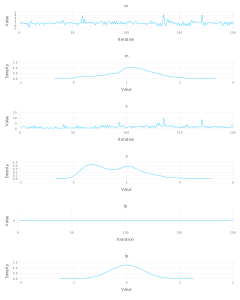

In [19]:
p = plot(c1)

set_default_plot_size(24cm, 30cm)
vstack(p[:])

In [21]:
49/24

2.0416666666666665

In [22]:
7/6

1.1666666666666667

In [45]:
plot

plot (generic function with 9 methods)

In [46]:
methods(plot)

# 9 methods for generic function "plot":
plot(elements::Union{Array{Gadfly.Layer,1}, Function, Gadfly.Element, Gadfly.Theme, Type}...; mapping...) in Gadfly at /home/wil/.julia/v0.6/Gadfly/src/Gadfly.jl:306
plot(data_source::Union{AbstractArray, DataFrames.AbstractDataFrame}, elements::Union{Array{Gadfly.Layer,1}, Function, Gadfly.Element, Gadfly.Theme, Type}...; mapping...) in Gadfly at /home/wil/.julia/v0.6/Gadfly/src/Gadfly.jl:300
plot(data_source::Union{AbstractArray, DataFrames.AbstractDataFrame, Void}, mapping::Dict, elements::Union{Array{Gadfly.Layer,1}, Function, Gadfly.Element, Gadfly.Theme, Type}...) in Gadfly at /home/wil/.julia/v0.6/Gadfly/src/Gadfly.jl:346
plot(fs::Array{T,1}, a::Number, b::Number, elements::Union{Function, Gadfly.Element, Gadfly.Theme, Type}...; mapping...) where T<:Union{Function, Type} in Gadfly at /home/wil/.julia/v0.6/Gadfly/src/poetry.jl:16
plot(f::Function, a::Number, b::Number, elements::Union{Function, Gadfly.Element, Gadfly.Theme, Type}...; mapping...) in Gadfly at /home/wil/.julia/v0.6/Gadfly/src/poetry.jl:46
plot(f::Function, xmin::Number, xmax::Number, ymin::Number, ymax::Number, elements::Union{Function, Gadfly.Element, Gadfly.Theme, Type}...; mapping...) in Gadfly at /home/wil/.julia/v0.6/Gadfly/src/poetry.jl:53
plot(c::Mamba.AbstractChains) in Mamba at /home/wil/.julia/v0.6/Mamba/src/output/plot.jl:60
plot(c::Mamba.AbstractChains, ptype::Array{Symbol,1}; legend, args...) in Mamba at /home/wil/.julia/v0.6/Mamba/src/output/plot.jl:60
plot(c::Mamba.AbstractChains, ptype::Symbol; legend, args...) in Mamba at /home/wil/.julia/v0.6/Mamba/src/output/plot.jl:70

In [47]:
size(c.value)

(200, 3, 1)

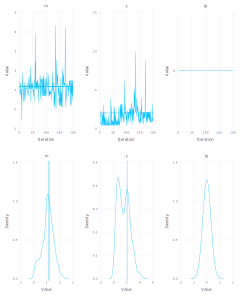

In [58]:
append!(p[1,1].layers, layer(x=[0,200], y=[7/6,7/6], Geom.line))
append!(p[2,1].layers, layer(xintercept=[7/6], Geom.vline))
append!(p[1,2].layers, layer(x=[0,200], y=[49/24,49/24], Geom.line))
append!(p[2,2].layers, layer(xintercept=[49/24], Geom.vline))

gridstack(p)

In [54]:
layer(x=[0 200], y=[7/6 7/6], Geom.line)

1-element Array{Gadfly.Layer,1}:
 Gadfly.Layer(nothing, Dict{Symbol,Any}(Pair{Symbol,Any}(:y, [1.16667 1.16667]),Pair{Symbol,Any}(:x, [0 200])), Gadfly.StatisticElement[], Gadfly.Geom.LineGeometry(Gadfly.Stat.Identity(), false, 2, Symbol("")), nothing, 0)